In [2]:
%matplotlib inline

import seaborn as sns
import pandas as pd
from libpysal import weights
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# read data
db = gpd.read_file("./week12inclass/tracts_2010_lc.shp")

# Index table on the GEOID
db = db.set_index("GEOID10", drop=False)

# Display summary
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 74 entries, 31109001302 to 31109001200
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    74 non-null     int64   
 1   STATEFP10   74 non-null     object  
 2   COUNTYFP10  74 non-null     object  
 3   TRACTCE10   74 non-null     object  
 4   GEOID10     74 non-null     object  
 5   NAME10      74 non-null     object  
 6   NAMELSAD10  74 non-null     object  
 7   MTFCC10     74 non-null     object  
 8   FUNCSTAT10  74 non-null     object  
 9   ALAND10     74 non-null     int64   
 10  AWATER10    74 non-null     int64   
 11  INTPTLAT10  74 non-null     object  
 12  INTPTLON10  74 non-null     object  
 13  GDB_GEOMAT  0 non-null      float64 
 14  Shape__Are  74 non-null     float64 
 15  Shape__Len  74 non-null     float64 
 16  geometry    74 non-null     geometry
dtypes: float64(3), geometry(1), int64(3), object(10)
memory usage: 12.5+ KB


In [14]:
db.crs
#wgs84

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
#let's project it (in place)
db = db.to_crs(epsg=26914) # EPSG for NAD84 UTM 14N

In [16]:
# Weights matrix under queen contiguity
w_queen = weights.Queen.from_dataframe(db, idVariable="GEOID10")
w_queen

/var/folders/wc/y8x0lwys7d7c8tfp4kpwxy8w0000gn/T/ipykernel_78034/2221968793.py:2: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.
  w_queen = weights.Queen.from_dataframe(db, idVariable="GEOID10")


In [17]:
db.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GDB_GEOMAT,Shape__Are,Shape__Len,geometry
GEOID10,,,,,,,,,,,,,,,,,
31109001302,375,31,109,001302,31109001302,13.02,Census Tract 13.02,G5020,S,2176814,0,+40.7927167,-096.6340321,NaN,2.341853e+07,20361.716815,"POLYGON ((699870.923 4519138.802, 700042.809 4..."
31109001400,376,31,109,001400,31109001400,14,Census Tract 14,G5020,S,2726305,0,+40.8064054,-096.6532808,NaN,2.932990e+07,21984.171116,"POLYGON ((698131.027 4519091.635, 698037.039 4..."
31109001500,377,31,109,001500,31109001500,15,Census Tract 15,G5020,S,2807893,0,+40.7932287,-096.6560502,NaN,3.020778e+07,25712.716123,"POLYGON ((696418.208 4518798.073, 696414.116 4..."
31109001600,378,31,109,001600,31109001600,16,Census Tract 16,G5020,S,2572821,0,+40.8064997,-096.6728453,NaN,2.767876e+07,21877.890524,"POLYGON ((695874.101 4520653.849, 695955.919 4..."
31109001700,379,31,109,001700,31109001700,17,Census Tract 17,G5020,S,1263366,0,+40.8031881,-096.6894790,NaN,1.359143e+07,17301.104765,"POLYGON ((695260.378 4519017.706, 695165.541 4..."


In [18]:
# Let's look at the neighbors for a random tract
w_queen['31109001700']
# output is a dict

{'31109001600': 1.0,
 '31109002001': 1.0,
 '31109002500': 1.0,
 '31109001800': 1.0,
 '31109002200': 1.0,
 '31109002300': 1.0,
 '31109001500': 1.0,
 '31109001900': 1.0}

In [19]:
# Pairwise comparison
w_queen['31109001700']['31109002500']

1.0

In [20]:
# not neighbors, so not in the dict. will return an error
w_queen['31109001700']['31109001400']


KeyError: '31109001400'

In [21]:
# ask the dict for neighbors of a particular feature
w_queen.neighbors['31109001700']
# looks similar to the dict, but is a list

['31109001600',
 '31109002001',
 '31109002500',
 '31109001800',
 '31109002200',
 '31109002300',
 '31109001500',
 '31109001900']

In [22]:
# weights
w_queen.weights['31109001700']

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [23]:
# how many neighbors does our tract have?
w_queen.cardinalities['31109001700']

8

In [24]:
# cardinalities of ALL tracts
queen_card = pd.Series(w_queen.cardinalities)
queen_card.head()

31109001302    6
31109001400    7
31109001500    7
31109001600    6
31109001700    8
dtype: int64

/var/folders/wc/y8x0lwys7d7c8tfp4kpwxy8w0000gn/T/ipykernel_78034/3566491921.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(queen_card, bins=10)


<Axes: ylabel='Density'>

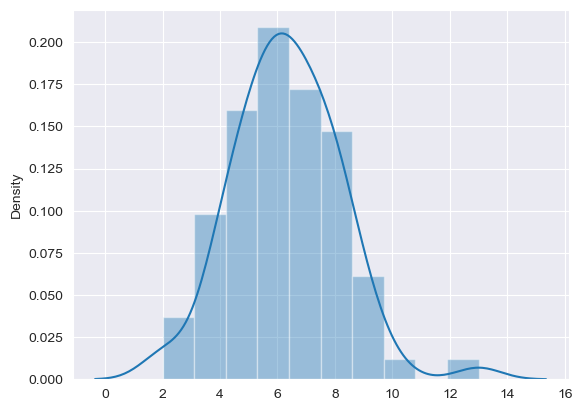

In [25]:
# quick histogram of neighbors in dataset
sns.distplot(queen_card, bins=10)

In [26]:
# stats

# Number of observations
w_queen.n

74

In [27]:
# Average number of neighbors
w_queen.mean_neighbors

6.324324324324325

In [28]:
# Min number of neighbors
w_queen.min_neighbors

2

In [29]:
# Max number of neighbors
w_queen.max_neighbors

13

In [30]:
# Islands (observations disconnected)
w_queen.islands

[]

In [31]:
# IDs in order (first 5)
w_queen.id_order[:5]

['31109001302', '31109001400', '31109001500', '31109001600', '31109001700']

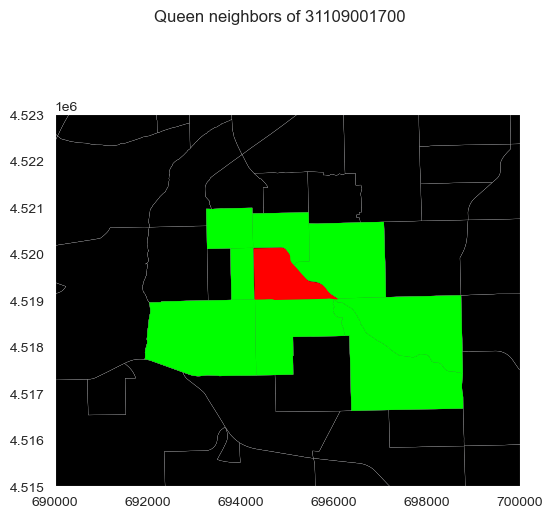

In [32]:
# plot, style, zoom in

# Setup figure
f, ax = plt.subplots(1, figsize=(6, 6))

# Plot base layer of polygons
db.plot(ax=ax, facecolor='k', linewidth=0.1)

# Select focal polygon geometry
focus = db.loc[['31109001700'], ['geometry']]

# Plot focal polygon
focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)

# Plot neighbors
neis = db.loc[w_queen['31109001700'].keys(), :]
neis.plot(ax=ax, facecolor='lime', linewidth=0)

# Title
f.suptitle("Queen neighbors of 31109001700")

# Style, zoom, and display on screen
ax.set_ylim(4515000, 4523000)
ax.set_xlim(690000, 700000)
plt.show()

In [33]:
w_rook = weights.Rook.from_dataframe(db, idVariable="GEOID10")
w_rook

/var/folders/wc/y8x0lwys7d7c8tfp4kpwxy8w0000gn/T/ipykernel_78034/4251635770.py:1: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.
  w_rook = weights.Rook.from_dataframe(db, idVariable="GEOID10")


In [34]:
# Let's look at the neighbors for a random tract
w_rook['31109001700']
# output is a dict

{'31109002300': 1.0,
 '31109001600': 1.0,
 '31109002001': 1.0,
 '31109001500': 1.0,
 '31109002500': 1.0,
 '31109001800': 1.0,
 '31109002200': 1.0}

In [35]:
# rook cardinalities of ALL tracts
rook_card = pd.Series(w_rook.cardinalities)
rook_card.head()

31109001302    4
31109001400    5
31109001500    6
31109001600    6
31109001700    7
dtype: int64

/var/folders/wc/y8x0lwys7d7c8tfp4kpwxy8w0000gn/T/ipykernel_78034/875078574.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rook_card, bins=10)


<Axes: ylabel='Density'>

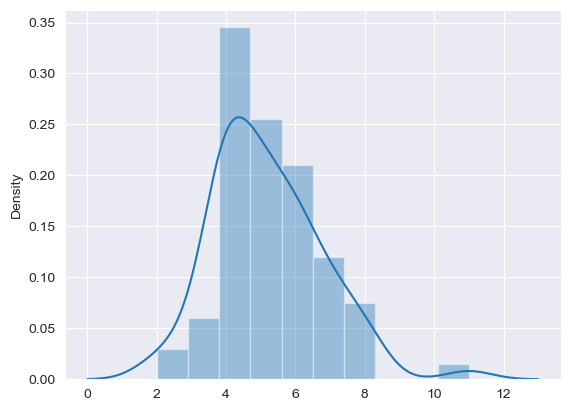

In [36]:
# quick histogram of neighbors in dataset
sns.distplot(rook_card, bins=10)

In [37]:
# Average number of neighbors
w_rook.mean_neighbors

5.1891891891891895

In [38]:
# can compare the two averages
w_queen.mean_neighbors - w_rook.mean_neighbors

1.135135135135135

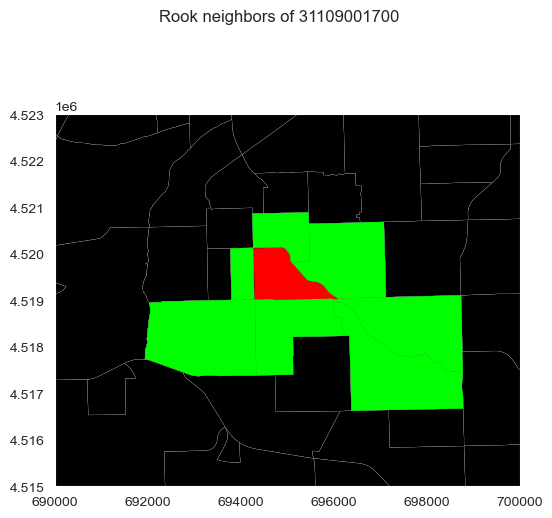

In [39]:
# plot, style, zoom in

# Setup figure
f, ax = plt.subplots(1, figsize=(6, 6))

# Plot base layer of polygons
db.plot(ax=ax, facecolor='k', linewidth=0.1)

# Select focal polygon geometry
focus = db.loc[['31109001700'], ['geometry']]

# Plot focal polygon
focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)

# Plot neighbors
neis = db.loc[w_rook['31109001700'].keys(), :]
neis.plot(ax=ax, facecolor='lime', linewidth=0)

# Title
f.suptitle("Rook neighbors of 31109001700")

# Style, zoom, and display on screen
ax.set_ylim(4515000, 4523000)
ax.set_xlim(690000, 700000)
plt.show()
# looks a bit different than the queen contiguity

In [40]:
### DISTANCE

In [41]:
# k nearest-neighbors

knn5 = weights.distance.KNN.from_dataframe(db, k = 5)

knn5

In [42]:
knn5['31109001700']

{'31109002001': 1.0,
 '31109001800': 1.0,
 '31109002300': 1.0,
 '31109002002': 1.0,
 '31109001600': 1.0}

In [44]:
# distance band
# binary output: 1 for inside the radius, 0 for outside

w_dist1kmB = weights.DistanceBand.from_dataframe(db, 1000)

/Users/pjbitterman/opt/anaconda3/envs/fixed_hopefully/lib/python3.8/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 62 disconnected components.
 There are 56 islands with ids: 31109001302, 31109001400, 31109001500, 31109001600, 31109002300, 31109002400, 31109002500, 31109002800, 31109003003, 31109003102, 31109983200, 31109003202, 31109003709, 31109003604, 31109003704, 31109003706, 31109003801, 31109003802, 31109010100, 31109003500, 31109003717, 31109001102, 31109001101, 31109010202, 31109003302, 31109003401, 31109003720, 31109003716, 31109003714, 31109003713, 31109003719, 31109003301, 31109003104, 31109010201, 31109003402, 31109003608, 31109003607, 31109003715, 31109003609, 31109003718, 31109003001, 31109010300, 31109010400, 31109002200, 31109003707, 31109000100, 31109002900, 31109003708, 31109000201, 31109000202, 31109000300, 31109000400, 31109000800, 31109000900, 31109001301, 31109001200.
  warnings.warn(message)


In [45]:
w_dist1kmB['31109001700']

{'31109001800': 1.0, '31109002001': 1.0}

In [46]:
# inverse distance weighted
w_dist1kmC = weights.DistanceBand.from_dataframe(db, 1000, binary=False) # note binary flag

/Users/pjbitterman/opt/anaconda3/envs/fixed_hopefully/lib/python3.8/site-packages/scipy/sparse/_data.py:117: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
/Users/pjbitterman/opt/anaconda3/envs/fixed_hopefully/lib/python3.8/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 62 disconnected components.
 There are 56 islands with ids: 31109001302, 31109001400, 31109001500, 31109001600, 31109002300, 31109002400, 31109002500, 31109002800, 31109003003, 31109003102, 31109983200, 31109003202, 31109003709, 31109003604, 31109003704, 31109003706, 31109003801, 31109003802, 31109010100, 31109003500, 31109003717, 31109001102, 31109001101, 31109010202, 31109003302, 31109003401, 31109003720, 31109003716, 31109003714, 31109003713, 31109003719, 31109003301, 31109003104, 31109010201, 31109003402, 31109003608, 31109003607, 31109003715, 31109003609, 31109003718, 31109003001, 31109010300, 311090104

In [47]:
w_dist1kmC['31109001700']

{'31109001800': 0.0010467253668101572, '31109002001': 0.001149701461259097}

In [48]:
### Transformations

w_queen.transform 
# output of 'O' means "original"

'O'

In [49]:
w_queen['31109001700'] # look at what we did originally

{'31109001600': 1.0,
 '31109002001': 1.0,
 '31109002500': 1.0,
 '31109001800': 1.0,
 '31109002200': 1.0,
 '31109002300': 1.0,
 '31109001500': 1.0,
 '31109001900': 1.0}

In [50]:
w_queen.transform  = 'R' # Row-standardize it

In [51]:
w_queen['31109001700'] # now check

{'31109001600': 0.125,
 '31109002001': 0.125,
 '31109002500': 0.125,
 '31109001800': 0.125,
 '31109002200': 0.125,
 '31109002300': 0.125,
 '31109001500': 0.125,
 '31109001900': 0.125}

In [52]:
pd.Series(w_queen['31109001700']).sum() # verify they sum to 1

1.0

In [53]:
# Compute spatial lag of `ALAND10`
w_queen_score = weights.lag_spatial(w_queen, db["ALAND10"])
# Print the first five elements
w_queen_score[:5]

array([3071286.66666667, 2703560.28571429, 2814847.71428571,
       2146014.33333333, 2089132.25      ])

In [54]:
# add the lagged variable to the data frame
db['w_area'] = w_queen_score


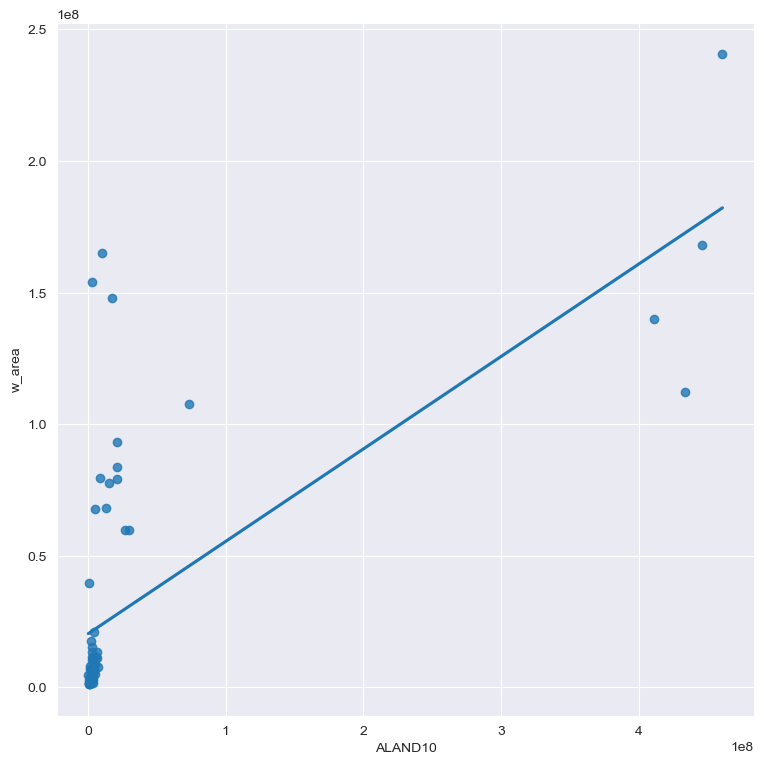

In [55]:
# scatter of area and lagged area

# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x="ALAND10", y="w_area", data=db, ci=None)
# Display
plt.show()

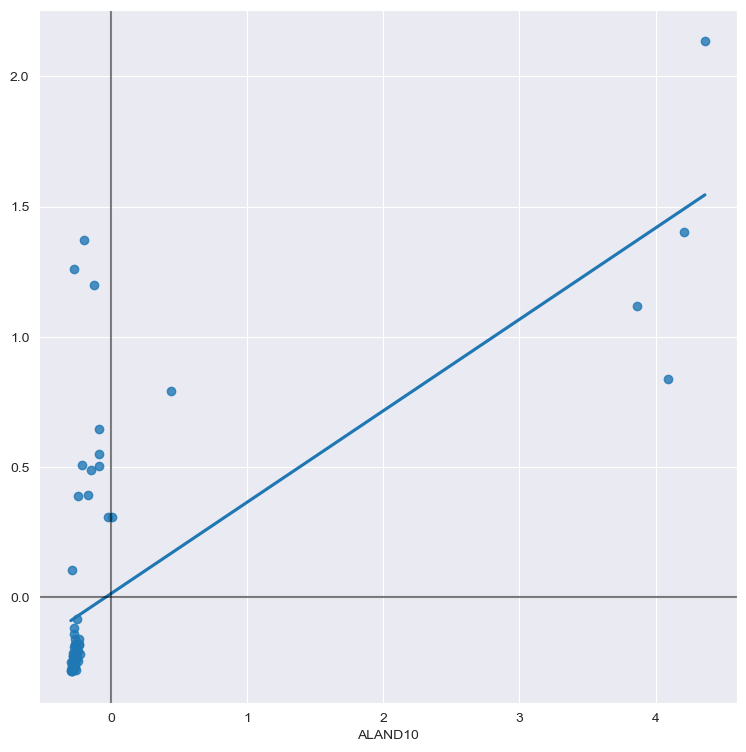

In [56]:
# Moran plot

# Standardize the area
std_db = (db['ALAND10'] - db['ALAND10'].mean()) / db['ALAND10'].std()
# Compute the spatial lag of the standardized version and save is as a 
# Series indexed as the original variable
std_w_db = pd.Series(weights.lag_spatial(w_queen, std_db), index=std_db.index)
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x=std_db, y=std_w_db, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Display
plt.show()